# Credit Card Fraud Detection Using Tensorflow/Keras

#### Below are the steps which we will be basically following:
1. Cleaning the Data
2. Undersampling the Data
3. Splitting the Data
4. Building a Multilayer Neural Network with Keras
5. Compiling
6. Training
7. Prediction 
8. Score

# Setting-up Envoirnment 

Firstly, we will import all the required libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['figure.figsize']=(12,5)
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a> <br>
## Loading Data

In [2]:
df_card = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [3]:
df_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#### Checking Shape and Size

In [4]:
print(df_card.shape)
print(df_card.size)

(284807, 31)
8829017


<a id="2"></a> <br>
# Cleaning the Data

In [5]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There is no missing value.

#### Dropping Time Column

In [6]:
df_card.drop(columns = ['Time'], inplace= True)

In [7]:
# Standardizing the amount column
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
#standard scaling
df_card['Stand_Amount'] = scaler.fit_transform(df_card['Amount'].values.reshape (-1,1))

#removing Amount
df = df_card.drop("Amount", axis=1)

#### Class column

<AxesSubplot:xlabel='Class', ylabel='count'>

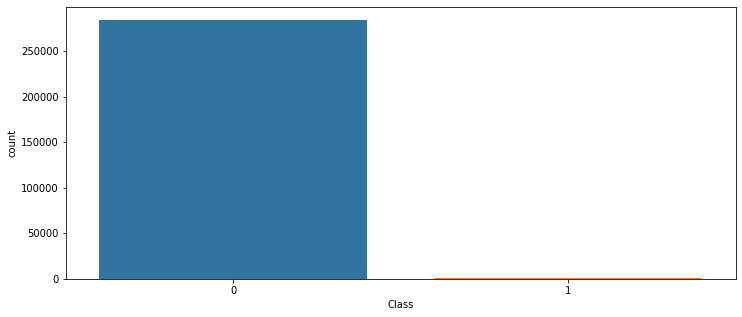

In [8]:
sns.countplot(x="Class", data=df_card)

The dataset is highly imbalanced so we need to undersample data.

# Undersampling the Data

In [9]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [10]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [11]:
# Define X and Y
X = df[cols]
Y = df[target]

# Undersampling
X_sample, Y_sample = undersample.fit_resample(X, Y)

In [12]:
test = pd.DataFrame(Y_sample, columns = ['Class'])

Text(0.5, 1.0, 'After')

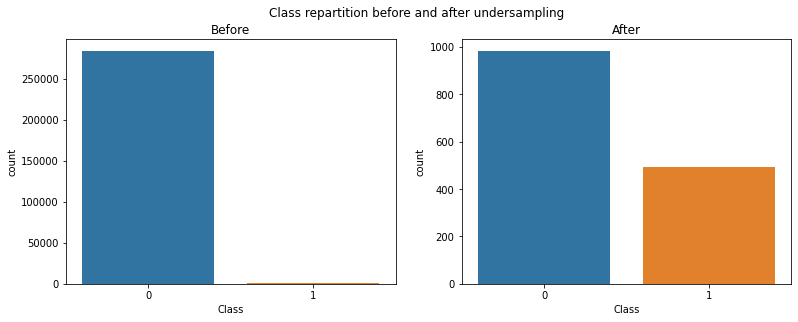

In [13]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

# Splitting the Data
Splitting data into training and testing data.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.3, random_state=1)

In [15]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1033
1033
443
443


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras import layers
from keras import regularizers
from sklearn import metrics

# Building a Multi-layer Neural Network

In [17]:
model = Sequential()
model.add(Dense(32 , activation='relu', input_shape=(X_train.shape[-1],))) # Input Layer
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(16 , activation='relu'))
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(8 , activation='relu'))
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(4 , activation='relu'))
model.add(Dense(1, activation='sigmoid'))

As this is a binary classification problem we will use **sigmoid activation** in the last layer.

# Compiling Model

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #optimizer

model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) 

As this is a binary classification problem we will use **Binary Cross Entropy** for loss and **Accuracy** for metric.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                960       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3

<a id="8"></a> <br>
## Training

In [20]:
num_epochs = 6
history = model.fit(X_train,y_train,epochs=num_epochs, batch_size=5, validation_split=0.2, verbose=0)
history_dict = history.history

##### Training Loss Vs Validation Loss

Text(0.5, 0, 'Epochs')

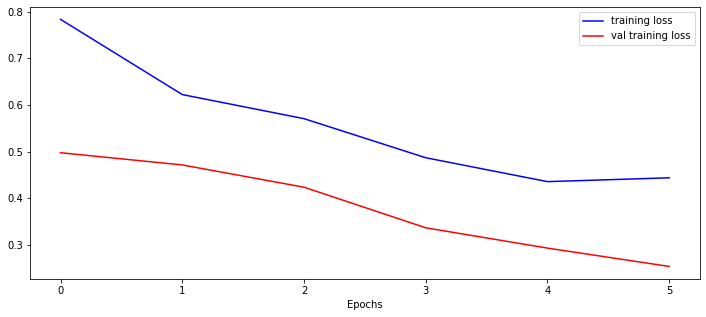

In [21]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

##### Validation accuracy

Text(0.5, 0, 'Epochs')

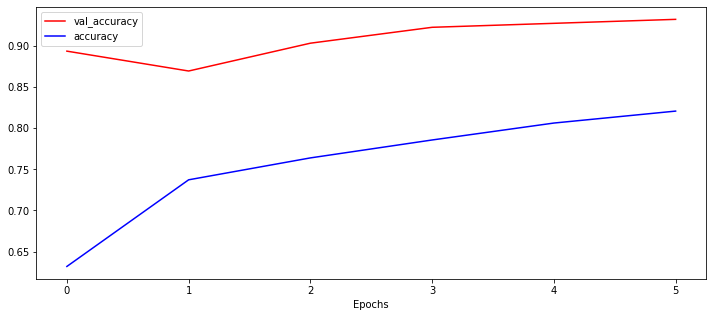

In [22]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

<a id="11"></a> <br>
## Prediction

In [23]:
y_pred = model.predict_classes(X_test)

## Score

In [24]:
#scores
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred))
#print(metrics.classification_report(y_test, y_pred))

Accuracy Neural Net: 0.9255079006772009
Precision Neural Net: 1.0
Recall Neural Net: 0.7843137254901961
F1 Score Neural Net: 0.8791208791208792


## ACCURACY = 92 %
Accuracy can be improved by tuning hyperparmeters.

### If this Kernel helped you in any way, some <span style="color:red">UPVOTES !!!</span> would be very much appreciated.